#Aula 1

Formulando hipóteses e respondendo a essas perguntas.

In [0]:
#Importando a base
import pandas as pd
base_imdb = pd.read_csv("https://raw.githubusercontent.com/llucaslleall/quarentena-dados/master/Bases/movie_metadata.csv")

In [0]:
#Verificando os valores distintos da coluna color
base_imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
#% em cada um dos valores acima (não considera o nan)
base_imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
#Contando o número de vezes que cada diretor aparece
base_imdb["director_name"].value_counts()

Steven Spielberg        26
Woody Allen             22
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            17
                        ..
Vondie Curtis-Hall       1
Kate Barker-Froyland     1
John Bonito              1
Andrew Jarecki           1
Dan Reed                 1
Name: director_name, Length: 2398, dtype: int64

In [0]:
#Descrevendo a coluna num_critic_for_reviews
base_imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [0]:
criticas = base_imdb["num_critic_for_reviews"]

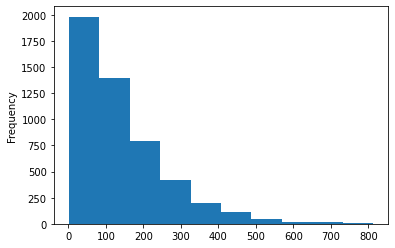

In [0]:
#Plotando a informação de críticas
criticas.plot(kind="hist")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


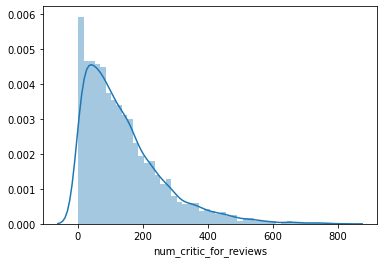

In [0]:
#Usando o gráfico do seaborn
import seaborn as sns
sns.distplot(criticas)

In [0]:
#Pegando os 5 primeiros com maior bilheteria
base_imdb.sort_values("gross",ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [0]:
#Pegando valores aleatórios
base_imdb.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4315,Color,James Watkins,161.0,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,Horror|Thriller,Michael Fassbender,Eden Lake,57811,14561,Lorraine Stanley,1.0,camping|forest|lake|stabbed with glass|vomiting,http://www.imdb.com/title/tt1020530/?ref_=fn_t...,357.0,English,UK,R,NaN,2008.0,698.0,6.8,2.35,0
946,Color,Spike Lee,230.0,129.0,0.0,277.0,James Ransone,18000.0,88504640.0,Crime|Drama|Mystery|Thriller,Denzel Washington,Inside Man,273108,19148,Peter Gerety,2.0,bank|detective|negotiation|police|robber,http://www.imdb.com/title/tt0454848/?ref_=fn_t...,646.0,English,USA,R,45000000.0,2006.0,412.0,7.6,2.35,0
4372,Color,Mitchell Altieri,NaN,87.0,9.0,165.0,Luke Edwards,467.0,NaN,Comedy|Horror|Thriller,Kimberley Crossman,A Beginner's Guide to Snuff,13,1270,Bree Williamson,0.0,NaN,http://www.imdb.com/title/tt4058122/?ref_=fn_t...,NaN,English,USA,NaN,NaN,2016.0,258.0,8.7,NaN,8
4119,Color,NaN,4.0,60.0,NaN,23.0,Amanda Mealing,40.0,NaN,Drama,Susan Hampshire,The Grand,437,158,Tim Healy,0.0,concierge|front desk|hotel|maid|prostitute,http://www.imdb.com/title/tt0118327/?ref_=fn_t...,20.0,English,UK,NaN,NaN,NaN,37.0,7.6,1.33,450
1823,Color,Menno Meyjes,118.0,106.0,43.0,460.0,Richard Schiff,1000.0,7486906.0,Comedy|Drama|Family,Oliver Platt,Martian Child,17436,2495,Sophie Okonedo,0.0,adopted son|adoption|boy|mars the planet|widower,http://www.imdb.com/title/tt0415965/?ref_=fn_t...,71.0,English,USA,PG,27000000.0,2007.0,506.0,6.8,1.85,0


#Analisando a cor do filme


In [0]:
#Tirando nulos (aqui vamos filtrar pelos valores não nulos)
color_or_bw = base_imdb.query("color in ['Color', ' Black and White']")
#Obs: tem um espaço antes do " Black"

In [0]:
#Criando a nova coluna com 0 ou 1
color_or_bw["color_0_ou_1"] = (color_or_bw["color"] == "Color")*1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
color_or_bw["color_0_ou_1"].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [0]:
color_or_bw.groupby("color_0_ou_1").mean()["imdb_score"]

color_0_ou_1
0    7.227273
1    6.409533
Name: imdb_score, dtype: float64

#Analisando a relação entre budget e faturamento

In [0]:
#Retirando os valores vazios
b_g = base_imdb[["director_name", "title_year", "country","budget","gross","imdb_score"]].dropna()

In [0]:
#Buscando apenas os registros americanos por causa do problema de conversão de moeda
imdb_usa = b_g.query("country == 'USA'")

In [0]:
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


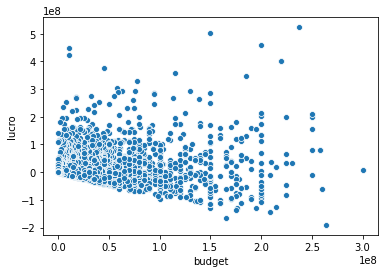

In [0]:
import seaborn as sns
sns.scatterplot(x="budget",y="lucro",data=imdb_usa)

In [0]:
imdb_usa.query("budget > 2.5*10**8 & lucro < -1.5*10**8")

,director_name,title_year,country,budget,gross,imdb_score,lucro
5,Andrew Stanton,2012.0,USA,263700000.0,73058679.0,6.6,-190641321.0


In [0]:
base_imdb.query("budget == 263700000.0 & gross == 73058679.0")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


#Verificando mais algumas relações

In [0]:
#Fazendo a contagem de filmes por diretor
filmes_diretor = imdb_usa["director_name"].value_counts()
filmes_diretor.head()

Steven Spielberg    23
Clint Eastwood      19
Martin Scorsese     16
Tim Burton          16
Woody Allen         15
Name: director_name, dtype: int64

In [0]:
#Fazendo o join das duas tabelas
gross_director = imdb_usa[["director_name","gross"]].set_index("director_name").join(filmes_diretor, on="director_name")

In [0]:
#Renomeando as colunas e retirando o index
gross_director.columns = ['arrecadacao', 'filmes_mesmo_diretor']
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,arrecadacao,filmes_mesmo_diretor
0,James Cameron,760505847.0,6
1,Gore Verbinski,309404152.0,7
2,Christopher Nolan,448130642.0,8
3,Andrew Stanton,73058679.0,3
4,Sam Raimi,336530303.0,10


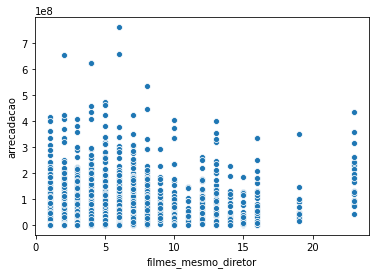

In [0]:
#Traçando o gráfico desses 2 valores
import seaborn as sns
sns.scatterplot(x="filmes_mesmo_diretor",y="arrecadacao",data=gross_director)

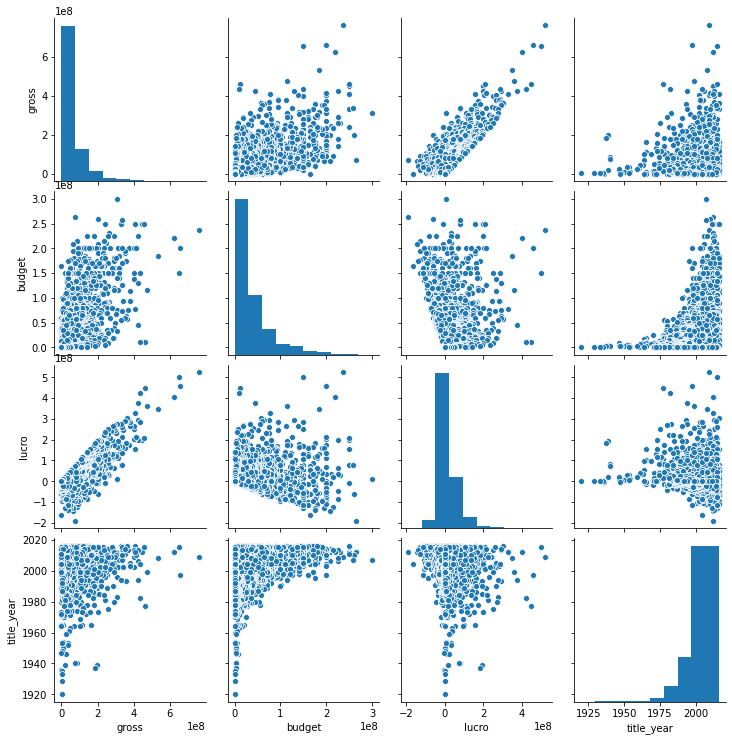

In [0]:
#Agora fazendo o gráfico da base considerando os dados 2 a 2
sns.pairplot(data=imdb_usa[["gross","budget","lucro","title_year"]])

In [0]:
imdb_usa[["gross","budget","lucro","title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.049971
budget,0.646158,1.000000,0.057774,0.238057
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.049971,0.238057,-0.122092,1.000000


#Desafio

## 1. Considerar a nota na correlação

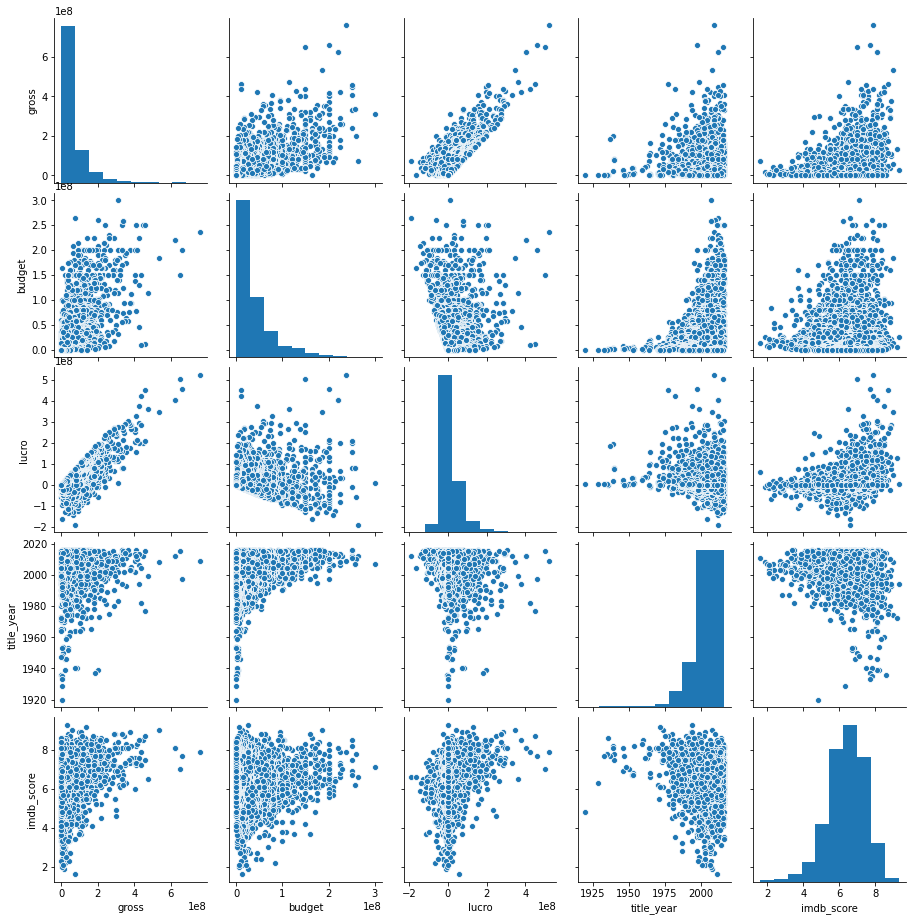

In [0]:
sns.pairplot(data=imdb_usa[["gross","budget","lucro","title_year","imdb_score"]])

In [0]:
imdb_usa[["gross","budget","lucro","title_year", "imdb_score"]].corr()

,gross,budget,lucro,title_year,imdb_score
gross,1.000000,0.646158,0.799260,0.049971,0.267903
budget,0.646158,1.000000,0.057774,0.238057,0.070414
lucro,0.799260,0.057774,1.000000,-0.122092,0.294991
title_year,0.049971,0.238057,-0.122092,1.000000,-0.144887
imdb_score,0.267903,0.070414,0.294991,-0.144887,1.000000


## Somente os filmes após 2000

In [0]:
#Filtrando só os filmes após 2000
imdb_usa = imdb_usa.query("title_year >= 2000")

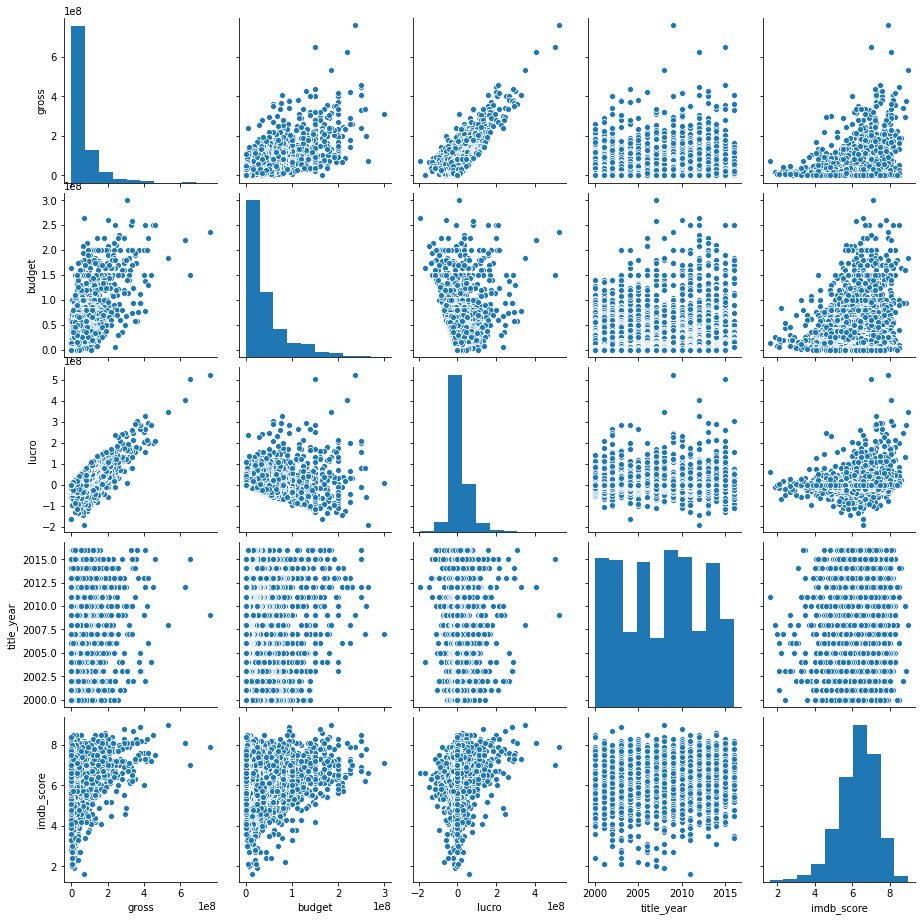

In [0]:
sns.pairplot(data=imdb_usa[["gross","budget","lucro","title_year","imdb_score"]])

In [0]:
imdb_usa[["gross","budget","lucro","title_year", "imdb_score"]].corr()

,gross,budget,lucro,title_year,imdb_score
gross,1.000000,0.708050,0.774906,0.113156,0.264461
budget,0.708050,1.000000,0.102324,0.139993,0.142933
lucro,0.774906,0.102324,1.000000,0.034094,0.244602
title_year,0.113156,0.139993,0.034094,1.000000,0.071050
imdb_score,0.264461,0.142933,0.244602,0.071050,1.000000
